# **Lab experience #3 (STUDENTS): Clustering - basics**

This third lab session aims to explore the importance of **input preparation** (e.g, normalization/scaling) and **feature selection** to obtain a "good" clustering solution. The **effectiveness of the clustering** is also evaluated. This lab session refers to Prof. Stella's lecture no.3 "Introduction to clustering".

In this lab, you are going to **(re-)use already known packages** (matplotlib, scipy, numpy, seaborn, sklearn). Check the two previous lab solutions.
For [**scikit-learn**](https://scikit-learn.org/stable/index.html), used to pre-process data, check documentatio, if needed, [here](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)).



Notes:
*   to rapidly access the documentation you can also create a new code cell and type in "function_name?" (e.g., matplotlib?) and run the cell.
*   to execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously or click on the "play" icon.


**Read the step-by-step instructions below** carefully and write your own code to fill the missing steps. **Guiding slides** are also available on Moodle to better explain the steps to perform.

### Load the input data and import useful packages

Here, you will import the data matrix to work on during this lab, set parameters N and M (defined by the number of objects and attributes, respectively), and import the useful packages.

---



In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler


# Load the data matrix (X)
X = np.load("Dataset_lab03.npy")


# Set the number of objects (no. rows of X)
N = X.shape[0]


# Set the no. of attributes or features (no. columns of X)
M = X.shape[1]



# ----------------------------------------
# Check the matrix shape and values
# ----------------------------------------
print("The matrix has shape = ", np.shape(X))
print('It has %d objects and %d attributes.' % (N, M) )
# print("Here are all values: \n", X)

The matrix has shape =  (30, 11)
It has 30 objects and 11 attributes.


**Task 1:** Randomly select two attributes (i.e., features), and print the data on screen and visualize it in _2 different ways choosing_ image (imshow), line plot (plot), or scatterplot (either sns.scatterplot or plot).

In [3]:
# -----------------------------------------------------------------------------
# TASK 1: Randomly select two features (give feat1 and feat2 a numerical index)
# -----------------------------------------------------------------------------
feat1 = 1
feat2 = 5

# check
values = X[:,[feat1,feat2]]
print(values.shape)

(30, 2)


**Task 2:** Reduce the dataset to keep 2 attributes, only, and visualize the objects in a scatterplot with those attributes.



In [4]:
# ---------------------------
# TASK 2a: Reduce the dataset
# ---------------------------
X_red = X[:,[feat1,feat2]]
X_red.shape

X_red

array([[-6.10000000e-01, -1.31990743e+01],
       [ 1.74000000e+00,  5.94575058e+00],
       [-2.06000000e+00, -1.26149264e+01],
       [-1.70000000e-01, -4.48404577e+01],
       [ 1.14000000e+00, -5.74170234e+01],
       [-1.20000000e-01, -5.81977223e+01],
       [-4.00000000e-01, -4.42803786e+01],
       [-1.12000000e+00,  5.28128979e+01],
       [-8.90000000e-01,  4.13681334e+01],
       [ 1.90000000e-01,  5.56161792e+00],
       [-3.50000000e-01, -1.16957729e+00],
       [ 8.40000000e-01,  1.12177690e+01],
       [ 1.25000000e+00, -2.21706236e+01],
       [ 1.13000000e+00, -3.79187758e+01],
       [-5.00000000e-01, -5.35308874e+01],
       [-3.10000000e-01,  5.02322134e+01],
       [-2.00000000e-01, -1.48103622e+01],
       [-6.70000000e-01,  3.94614970e+01],
       [ 1.90000000e-01, -2.57308462e+01],
       [-3.40000000e-01,  4.29976604e+01],
       [ 1.22000000e+00,  4.37375316e+01],
       [ 7.40000000e-01, -5.89512763e+00],
       [ 3.20000000e-01, -1.18224500e+01],
       [-4.

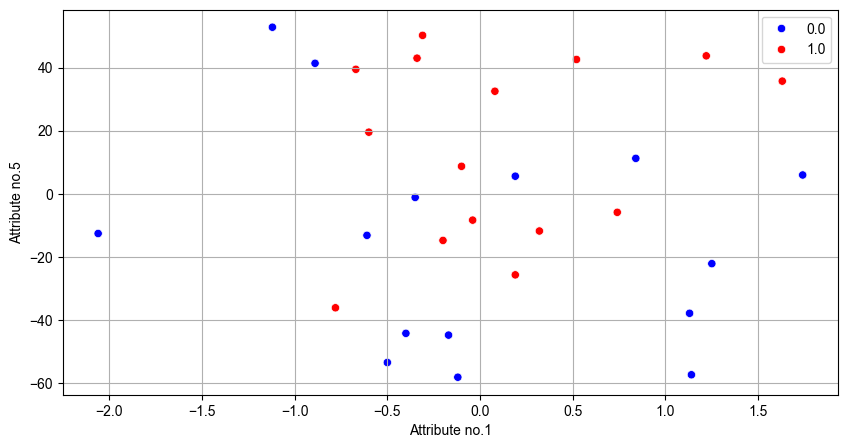

In [5]:
# --------------------
# TASK 2b: Scatterplot
# --------------------
fig1 = plt.figure('Dataset described by two attributes', figsize=(10,5))
PAL = ['blue', 'red']
x = X_red[:, 0]
y = X_red[:, 1]
sns.scatterplot(x=x, y=y, hue=X[:,-1], palette=PAL)
sns.set_theme(style='dark')
plt.xlabel('Attribute no.%s' % feat1)
plt.ylabel('Attribute no.%s' % feat2)
plt.grid()
fig1.savefig('Scatterplot_with_random_attributes.png', dpi=100)

**Task 3:** Compute the proximity matrix and plot it.

Hint:
*   check Lab02 solution
*   for the proximity metric, you can choose one of the following: 'euclidean', 'minkowski', 'mahalanobis',  'hamming'/'matching', 'jaccard', 'cosine', 'correlation'.
*   for computing the distances between two objects you can use: pdist() from the [scipy.spatial.distance](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) package.

**Note that the proximity values depend on the choice of the attributes that you use to represent objects.**

_Note: alternatively, you can use sklearn.metrics.pairwise_distances package (documentation available [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html) )._

In [6]:
# -------------------------------------
# TASK 3a: Compute the PROXIMITY MATRIX
# -------------------------------------
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf

# Choose one proximity metric
METRIC = 'euclidean'

# Compute the proximity matrix using pdist() (see Lab02)
PM = pdist(X_red, metric = METRIC)
PM = sf(PM).round(2)
PM

array([[  0.  ,  19.29,   1.56,  31.64,  44.25,  45.  ,  31.08,  66.01,
         54.57,  18.78,  12.03,  24.46,   9.16,  24.78,  40.33,  63.43,
          1.66,  52.66,  12.56,  56.2 ,  56.97,   7.43,   1.66,   4.86,
         22.97,  48.97,  32.73,  55.8 ,  21.9 ,  45.71],
       [ 19.29,   0.  ,  18.95,  50.82,  63.37,  64.17,  50.27,  46.95,
         35.52,   1.6 ,   7.42,   5.35,  28.12,  43.87,  59.52,  44.33,
         20.85,  33.6 ,  31.71,  37.11,  37.8 ,  11.88,  17.82,  14.43,
         42.19,  29.77,  13.78,  36.66,   3.31,  26.61],
       [  1.56,  18.95,   0.  ,  32.28,  44.92,  45.62,  31.71,  65.43,
         54.  ,  18.32,  11.57,  24.01,  10.11,  25.5 ,  40.95,  62.87,
          2.88,  52.09,  13.31,  55.64,  56.45,   7.28,   2.51,   4.7 ,
         23.59,  48.47,  32.17,  55.26,  21.4 ,  45.17],
       [ 31.64,  50.82,  32.28,   0.  ,  12.64,  13.36,   0.61,  97.66,
         86.21,  50.4 ,  43.67,  56.07,  22.71,   7.04,   8.7 ,  95.07,
         30.03,  84.3 ,  19.11,  87.8

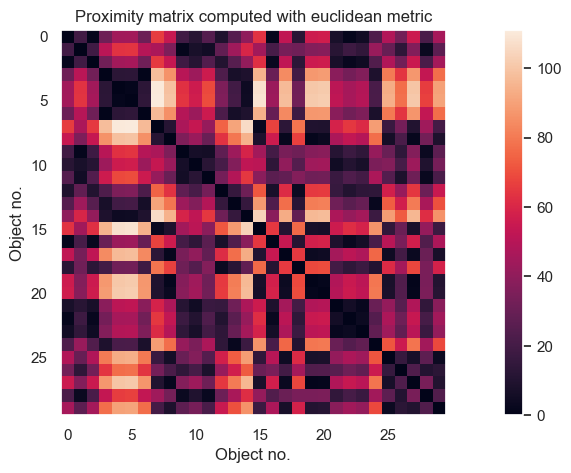

               0       1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      28      29
       0     0.0   19.29    1.56   31.64   44.25    45.0   31.08   66.01   54.57   18.78   12.03   24.46    9.16   24.78   40.33   63.43    1.66   52.66   12.56    56.2   56.97    7.43    1.66    4.86   22.97   48.97   32.73    55.8    21.9   45.71
       1   19.29     0.0   18.95   50.82   63.37   64.17   50.27   46.95   35.52     1.6    7.42    5.35   28.12   43.87   59.52   44.33   20.85    33.6   31.71   37.11    37.8   11.88   17.82   14.43   42.19   29.77   13.78   36.66    3.31   26.61
       2    1.56   18.95     0.0   32.28   44.92   45.62   31.71   65.43    54.0   18.32   11.57   24.01   10.11    25.5   40.95   62.87    2.88   52.09   13.31   55.64   56.45    7.28    2.51     4.7   23.59   48.47   32.17   55.26    21.4   45.17
    

In [7]:
# ------------------------------------------------------
# TASK 3b: Plot the proximity matrix. Hint: use imshow()
# ------------------------------------------------------
fig2 = plt.figure(figsize=(15, 5))
# plot the matrix as image
plt.imshow(PM)
plt.xlabel('Object no.')
plt.ylabel('Object no.')
plt.title('Proximity matrix computed with %s metric' % METRIC)
plt.colorbar()
plt.show()

# Print the proximity matrix values
format_row = "{:>8}" * (len(pd.DataFrame(PM).columns.values) + 1)
print(format_row.format("", *pd.DataFrame(PM).columns.values))
for r, row in zip(pd.DataFrame(PM).columns.values, PM):
    print(format_row.format(r, *row))

**Task 4:** Compute the "centroids", i.e., the mean point of each group of objects, _using only the two selected attributes_ and print their coordinates.

In [8]:
# ----------------------------------------------------------
# TASK4a: Compute the centroids of each clusters (see Lab02)
# ----------------------------------------------------------
DIM = X_red.shape[1]                             # dimensionality of the dataset, i.e., how many attributes to represent each object
centroidk = np.zeros((2,DIM))
K = 2


print("We need to compute %d centroids, as we have %d clusters.\n" % (K, K) )
for k in range(0, K):
   # compute the cluster_points
   labels = X[:, -1]
   cluster_points = X_red[np.where(labels == k)]
   print(cluster_points.round(2))

   # Compute the coordinates of the centroid of each group
   centroidk[k,:] = np.array(cluster_points).mean(axis=0)
   print("The centroid of cluster %d has coordinates: " % k, *centroidk[k,:].round(2), "\n")

We need to compute 2 centroids, as we have 2 clusters.

[[ -0.61 -13.2 ]
 [  1.74   5.95]
 [ -2.06 -12.61]
 [ -0.17 -44.84]
 [  1.14 -57.42]
 [ -0.12 -58.2 ]
 [ -0.4  -44.28]
 [ -1.12  52.81]
 [ -0.89  41.37]
 [  0.19   5.56]
 [ -0.35  -1.17]
 [  0.84  11.22]
 [  1.25 -22.17]
 [  1.13 -37.92]
 [ -0.5  -53.53]]
The centroid of cluster 0 has coordinates:  0.0 -15.23 

[[-3.100e-01  5.023e+01]
 [-2.000e-01 -1.481e+01]
 [-6.700e-01  3.946e+01]
 [ 1.900e-01 -2.573e+01]
 [-3.400e-01  4.300e+01]
 [ 1.220e+00  4.374e+01]
 [ 7.400e-01 -5.900e+00]
 [ 3.200e-01 -1.182e+01]
 [-4.000e-02 -8.370e+00]
 [-7.800e-01 -3.617e+01]
 [ 1.630e+00  3.572e+01]
 [-6.000e-01  1.953e+01]
 [ 5.200e-01  4.259e+01]
 [-1.000e-01  8.700e+00]
 [ 8.000e-02  3.251e+01]]
The centroid of cluster 1 has coordinates:  0.11 14.18 



[ 4.66666667e-03 -1.52288852e+01]
[ 0.11066667 14.17757692]


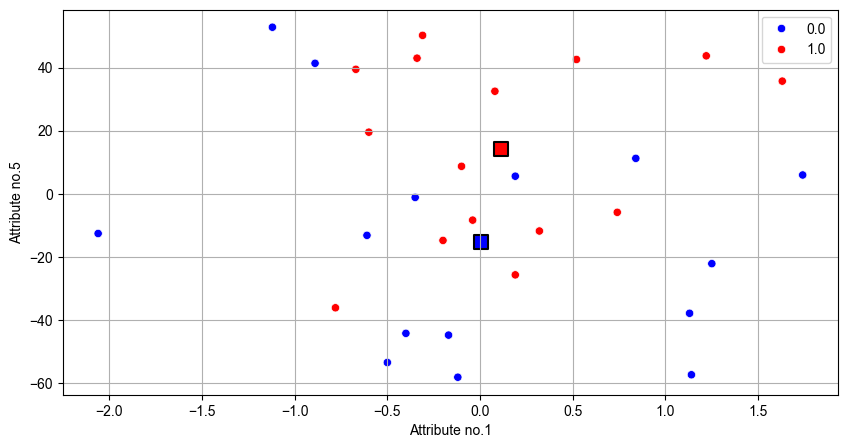

In [9]:
# ------------------------------------------------------------
# TASK4b: Plot the centroids for all groups in the same figure
# ------------------------------------------------------------
plt.figure(fig1)
for k in range(0, K):
    print(centroidk[k,:])
    plt.scatter(x=centroidk[k,0], y=centroidk[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)
plt.show()

**Task 5:** Compute the intra-cluster distance (d) and the inter-cluster distance (D). Print both values.

Use the following definitions:
*   **intra-cluster distance**: average distance between the pairwise distances of all objects in the cluster (i.e., group)
*   **inter-cluster distance**: distance between centroids.

In [10]:
# -------------------------------------------------
# TASK5: Compute intra- and inter-cluster distances
# -------------------------------------------------

# Intra-cluster distances (average over all pairwise distances)
d = np.zeros(K)
for k in range(0,K):
  ind = np.array( np.where(X[:,-1]==k) )
  print(ind.size)
  print(PM[ind][0])
  PM_k = PM[ind][0]
  d[k] = np.mean( PM_k[np.triu_indices(ind.size, k = 1)] )

print("The intra-cluster distance of the two clusters are: ", d.round(2))


# Inter-cluster distance
D = pdist(centroidk, metric=METRIC)
D = sf(D).round(2)

print("The inter-cluster distance of the two clusters is: ", D[0,1].round(2))

15
[[  0.    19.29   1.56  31.64  44.25  45.    31.08  66.01  54.57  18.78
   12.03  24.46   9.16  24.78  40.33  63.43   1.66  52.66  12.56  56.2
   56.97   7.43   1.66   4.86  22.97  48.97  32.73  55.8   21.9   45.71]
 [ 19.29   0.    18.95  50.82  63.37  64.17  50.27  46.95  35.52   1.6
    7.42   5.35  28.12  43.87  59.52  44.33  20.85  33.6   31.71  37.11
   37.8   11.88  17.82  14.43  42.19  29.77  13.78  36.66   3.31  26.61]
 [  1.56  18.95   0.    32.28  44.92  45.62  31.71  65.43  54.    18.32
   11.57  24.01  10.11  25.5   40.95  62.87   2.88  52.09  13.31  55.64
   56.45   7.28   2.51   4.7   23.59  48.47  32.17  55.26  21.4   45.17]
 [ 31.64  50.82  32.28   0.    12.64  13.36   0.61  97.66  86.21  50.4
   43.67  56.07  22.71   7.04   8.7   95.07  30.03  84.3   19.11  87.84
   88.59  38.96  33.02  36.47   8.69  80.58  64.37  87.43  53.54  77.35]
 [ 44.25  63.37  44.92  12.64   0.     1.48  13.23 110.25  98.81  62.99
   56.27  68.64  35.25  19.5    4.22 107.66  42.63  96.9   3

**Task 6** Answer the following question in your lab report, adding a short motivation.

**Question:** "Based on inter-/intra-cluster distances, do you think the found one is a good clustering solution?"

# NO


---


### **_This is the end of Part 1._**


---



---

**Task 7**: Go back to the original data matrix (with 10 attributes), plot it as a 2D image, and now select two attributes based on some criteria that you decide.

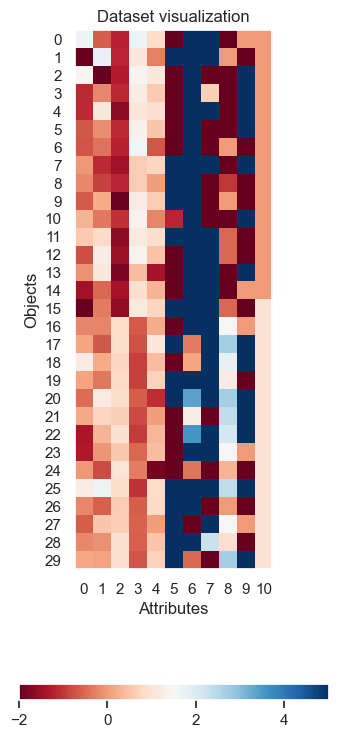

In [11]:
# -----------------------------------------------------
# TASK7a: Visualize the original data matrix as an image
# -----------------------------------------------------
fig3 = plt.figure(figsize=(4,10))
plt.imshow(X, cmap = 'RdBu', vmin = -2, vmax=5)
plt.title('Dataset visualization')
# plot the image
plt.xlabel('Attributes')
plt.ylabel('Objects')
plt.xticks(np.arange(0, M, step=1)) #ALTERNATIVE: plt.xticks(np.arange(M), ['1', '2', '3'])
plt.yticks(np.arange(0, N, step=1))
plt.colorbar(orientation='horizontal')
plt.show()

In [12]:
X.min()

-58.197722310945316

The centroid of cluster 0 has coordinates:  -1.37 1.14 

The centroid of cluster 1 has coordinates:  0.65 -0.58 



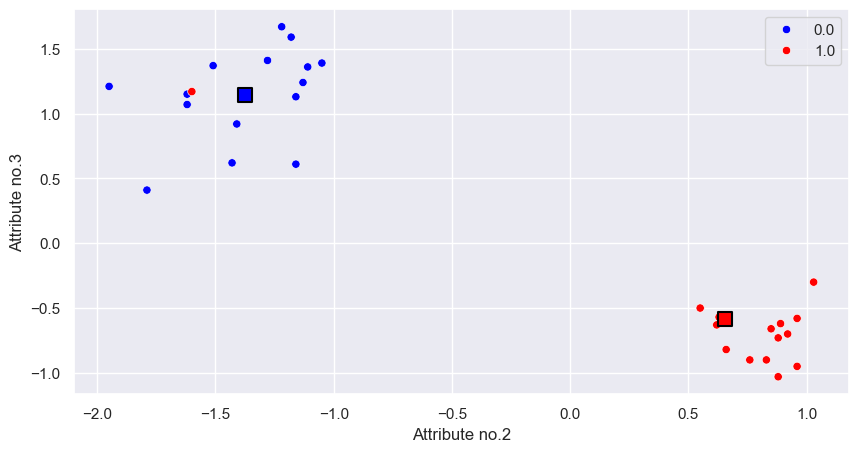

In [13]:
# -----------------------------------------------------------
# TASK7b: Select two attributes and reduce the initial matrix
# -----------------------------------------------------------

# Choose two attributes based on your criteria
feat3 = 2
feat4 = 3 # they are the ones with most difference, look at the graph

# Reduce the data matrix (call it X_red2)
X_red2 = X[:,[feat3, feat4]]


# Compute the centroids
centroidk_red2 = np.zeros((2,DIM))
for k in range(0, K):
   ind = np.where(labels == k)
   cluster_points = X_red2[ind]
   centroidk_red2[k,:] = np.array(cluster_points).mean(axis = 0)
   print("The centroid of cluster %d has coordinates: " % k, *centroidk_red2[k,:].round(2), "\n")


# Verify your choice by scatterplotting the new reduced dataset
fig4 = plt.figure('New reduced dataset (two attributes)', figsize=(10,5))
# use seaborn to scatterplot the objects using the two attributes
sns.set_theme(style='dark')
plt.xlabel('Attribute no.%s' % feat3)
plt.ylabel('Attribute no.%s' % feat4)
sns.scatterplot(x = X_red2[:,0], y = X_red2[:,1], hue=X[:,-1], palette=PAL)
plt.grid()
for k in range(0, K):
    # add the centroids using the usual color/type of marker as before
    plt.scatter(x=centroidk_red2[k,0], y=centroidk_red2[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)
plt.show()

**Task 8:** Repeat tasks 3 and 5, to support your previous choice (Task 7), and derive conclusions.


---


### **_This is the end of Part 2._**


---



---

Very often, before going to clustering or any other ML-based modelling, _input scaling or normalization_ can be considered. Here, you will explore the effect of the four main transformations (using sklearn) on this specific input dataset:

*   [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

*   [sklearn.preprocessing.normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html)

*   [sklearn.preprocessing.RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

*   [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)


**Task 9:** Consider your reduced dataset (X_red2 from Task 7), apply one of the above transformations (call the output as X_red2_transformed), and compute centroids (task 4) to derive conclusions on the effect of such scaling.


_Note: to use them, use .fit_transform() that computes parameters (e.g., mean, std) during the "fit" phase, and then applies the transformation on the data during the "transform" phase._

In [14]:
# Note: All scalers have been already imported (see the very beginning of this file).
# You can choose among: MinMaxScaler(), RobustScaler(), Normalizer(), StandardScaler()

# Initialize the scaler you want to use
scaler = Normalizer()

# Apply the scaling to data using .fit_transform()
X_red2_transformed = scaler.fit_transform(X_red2)

In [15]:
# Compute the new centroids
centroidk_transf = np.zeros((2,DIM))
   
for k in range(0, K):
   # compute the cluster_points
   labels = X[:, -1]
   cluster_points = X_red2_transformed[np.where(labels == k)]
   print(cluster_points.round(2))

   # Compute the coordinates of the centroid of each group
   centroidk_transf[k,:] = np.array(cluster_points).mean(axis=0)
   print("The centroid of cluster %d has coordinates: " % k, *centroidk[k,:].round(2), "\n")

[[-0.59  0.81]
 [-0.72  0.7 ]
 [-0.67  0.74]
 [-0.67  0.74]
 [-0.83  0.55]
 [-0.63  0.77]
 [-0.6   0.8 ]
 [-0.92  0.4 ]
 [-0.89  0.47]
 [-0.85  0.53]
 [-0.6   0.8 ]
 [-0.82  0.58]
 [-0.74  0.67]
 [-0.97  0.22]
 [-0.84  0.55]]
The centroid of cluster 0 has coordinates:  0.0 -15.23 

[[-0.81  0.59]
 [ 0.79 -0.61]
 [ 0.77 -0.64]
 [ 0.65 -0.76]
 [ 0.68 -0.74]
 [ 0.82 -0.57]
 [ 0.63 -0.78]
 [ 0.71 -0.7 ]
 [ 0.74 -0.67]
 [ 0.96 -0.28]
 [ 0.65 -0.76]
 [ 0.7  -0.71]
 [ 0.74 -0.67]
 [ 0.86 -0.52]
 [ 0.8  -0.61]]
The centroid of cluster 1 has coordinates:  0.11 14.18 



[ 4.66666667e-03 -1.52288852e+01]
[ 0.11066667 14.17757692]
[ 4.66666667e-03 -1.52288852e+01]
[ 0.11066667 14.17757692]


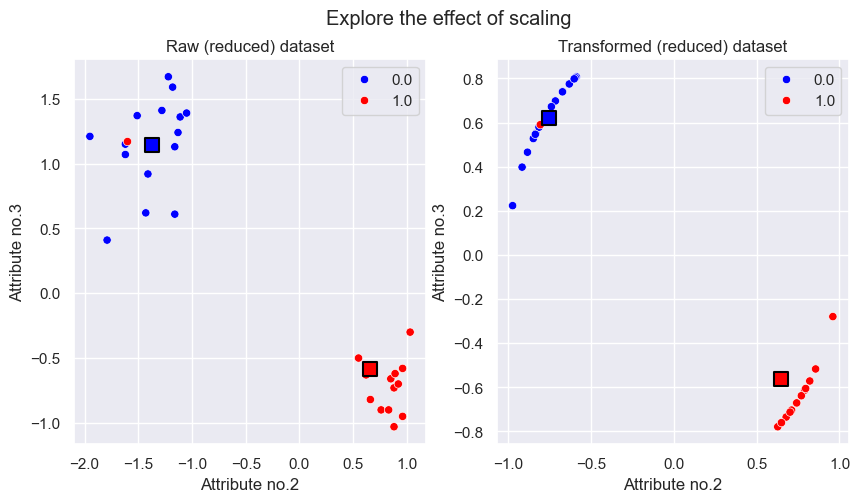

In [16]:
# Plot the new scatterplot, with centroids, of transformed X_red2 and compare with the previous one
fig5, (ax1, ax2) = plt.subplots(1, 2, figsize= (10,5), gridspec_kw={'width_ratios': [1, 1]})
fig5.suptitle('Explore the effect of scaling')

# panel (a): No scaling
plt.subplot(121)
# plot here the objects of the reduced dataset with proper choice of attributes (X_red2). Use the usual style (colors, marker style for centroids)

sns.scatterplot(x = X_red2[:,0], y = X_red2[:,1], hue = X[:,-1], palette=PAL)


sns.set_theme(style='dark')
ax1.set_xlabel('Attribute no.%s' % feat3)
ax1.set_ylabel('Attribute no.%s' % feat4)
ax1.set_title('Raw (reduced) dataset')
ax1.grid()
for k in range(0, K):
    # add the centroids
    print(centroidk[k,:])
    plt.scatter(x=centroidk_red2[k,0], y=centroidk_red2[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)
    


# panel (b): With scaling
plt.subplot(122)
# plot here the objects of the reduced and transformed dataset with proper choice of attributes (X_red2_transformed)
sns.set_theme(style='dark')


sns.scatterplot(x = X_red2_transformed[:,0], y = X_red2_transformed[:,1], hue = X[:,-1], palette=PAL)
ax2.set_xlabel('Attribute no.%s' % feat3)
ax2.set_ylabel('Attribute no.%s' % feat4)
ax2.set_title('Transformed (reduced) dataset')
ax2.grid()
for k in range(0, K):
    # add centroids
    print(centroidk[k,:])
    plt.scatter(x=centroidk_transf[k,0], y=centroidk_transf[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)
    
plt.show()

**Task 10a:** Repeat also tasks 3 and 5, to support your claim of Task 9 (scaler choice).

In [17]:
# -------------------------------------
# TASK 3a: Compute the PROXIMITY MATRIX
# -------------------------------------
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf

# Choose one proximity metric
METRIC = 'euclidean'

# Compute the proximity matrix using pdist() (see Lab02)
PM = pdist(X_red2_transformed, metric = METRIC)
PM = sf(PM).round(2)
PM

array([[0.  , 0.17, 0.11, 0.11, 0.35, 0.05, 0.01, 0.52, 0.45, 0.38, 0.02,
        0.32, 0.2 , 0.7 , 0.36, 0.31, 1.98, 1.98, 2.  , 2.  , 1.97, 2.  ,
        1.99, 1.99, 1.89, 2.  , 1.99, 1.99, 1.96, 1.98],
       [0.17, 0.  , 0.06, 0.06, 0.19, 0.11, 0.16, 0.36, 0.29, 0.22, 0.15,
        0.15, 0.04, 0.54, 0.19, 0.14, 2.  , 2.  , 2.  , 2.  , 1.99, 2.  ,
        2.  , 2.  , 1.94, 2.  , 2.  , 2.  , 1.99, 2.  ],
       [0.11, 0.06, 0.  , 0.  , 0.25, 0.05, 0.1 , 0.42, 0.35, 0.28, 0.09,
        0.22, 0.1 , 0.6 , 0.25, 0.2 , 1.99, 2.  , 2.  , 2.  , 1.99, 2.  ,
        2.  , 2.  , 1.92, 2.  , 2.  , 2.  , 1.98, 1.99],
       [0.11, 0.06, 0.  , 0.  , 0.25, 0.05, 0.1 , 0.42, 0.35, 0.28, 0.09,
        0.21, 0.09, 0.6 , 0.25, 0.2 , 1.99, 2.  , 2.  , 2.  , 1.99, 2.  ,
        2.  , 2.  , 1.93, 2.  , 2.  , 2.  , 1.98, 1.99],
       [0.35, 0.19, 0.25, 0.25, 0.  , 0.3 , 0.35, 0.17, 0.1 , 0.03, 0.34,
        0.03, 0.15, 0.36, 0.01, 0.05, 2.  , 2.  , 1.98, 1.99, 2.  , 1.98,
        1.99, 1.99, 1.98, 1.98, 

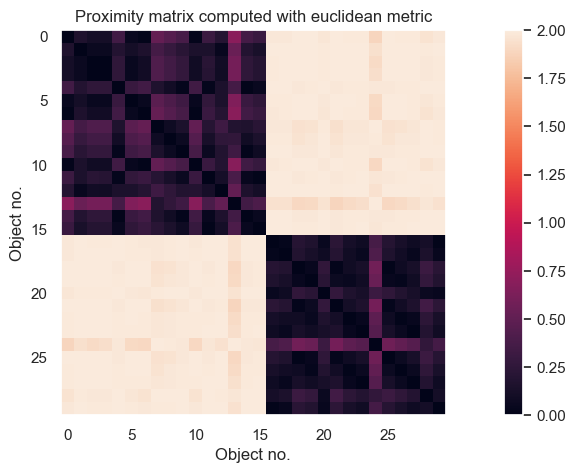

               0       1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      28      29
       0     0.0    0.17    0.11    0.11    0.35    0.05    0.01    0.52    0.45    0.38    0.02    0.32     0.2     0.7    0.36    0.31    1.98    1.98     2.0     2.0    1.97     2.0    1.99    1.99    1.89     2.0    1.99    1.99    1.96    1.98
       1    0.17     0.0    0.06    0.06    0.19    0.11    0.16    0.36    0.29    0.22    0.15    0.15    0.04    0.54    0.19    0.14     2.0     2.0     2.0     2.0    1.99     2.0     2.0     2.0    1.94     2.0     2.0     2.0    1.99     2.0
       2    0.11    0.06     0.0     0.0    0.25    0.05     0.1    0.42    0.35    0.28    0.09    0.22     0.1     0.6    0.25     0.2    1.99     2.0     2.0     2.0    1.99     2.0     2.0     2.0    1.92     2.0     2.0     2.0    1.98    1.99
    

In [18]:
# ------------------------------------------------------
# TASK 3b: Plot the proximity matrix. Hint: use imshow()
# ------------------------------------------------------
fig2 = plt.figure(figsize=(15, 5))
# plot the matrix as image
plt.imshow(PM)
plt.xlabel('Object no.')
plt.ylabel('Object no.')
plt.title('Proximity matrix computed with %s metric' % METRIC)
plt.colorbar()
plt.show()

# Print the proximity matrix values
format_row = "{:>8}" * (len(pd.DataFrame(PM).columns.values) + 1)
print(format_row.format("", *pd.DataFrame(PM).columns.values))
for r, row in zip(pd.DataFrame(PM).columns.values, PM):
    print(format_row.format(r, *row))

**Task 10b:** Apply another scaler, and derive conclusions on the different effects on the clustering.



---


## **_This is the end of Lab#3 session._**


---



---



In [21]:
X[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
X.mean(axis=0)

array([-0.28133333,  0.05766667, -0.36      ,  0.281     ,  0.285     ,
       -0.52565414, 13.649     ,  9.39299173, -0.36      , -0.33333333,
        0.5       ])